In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import create_data_po
importlib.reload(create_data_po)

<module 'create_data_po' from '/home/sychen23/DRAM/create_data_po.py'>

In [2]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [3]:
margin = 5
spacing = 10
width = 3
height = 3
min_blobs = 1
max_blobs = 9

# Generate data

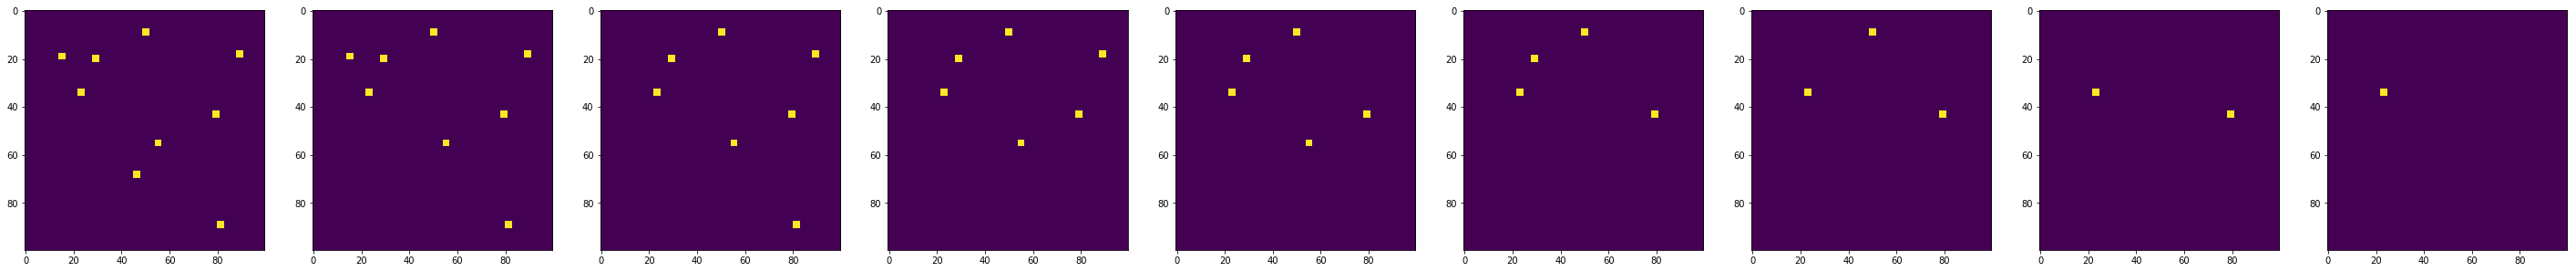

In [4]:
images_inc, label_inc_scalar, label_inc_classifier = create_data_po.get_po_inc(margin, spacing, width, height, min_blobs, max_blobs)
pickle.dump( (images_inc, label_inc_scalar, label_inc_classifier), open( "po_inc.p", "wb" ) )

# Display images of one set
fig, axs = plt.subplots(1, max_blobs, figsize=(50,5))
for i in range(max_blobs):
    axs[i].imshow(list(chunks(images_inc[i], 100))) 
plt.show()

In [5]:
label_inc_scalar[0]

array([9.])

In [6]:
label_inc_classifier[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.])

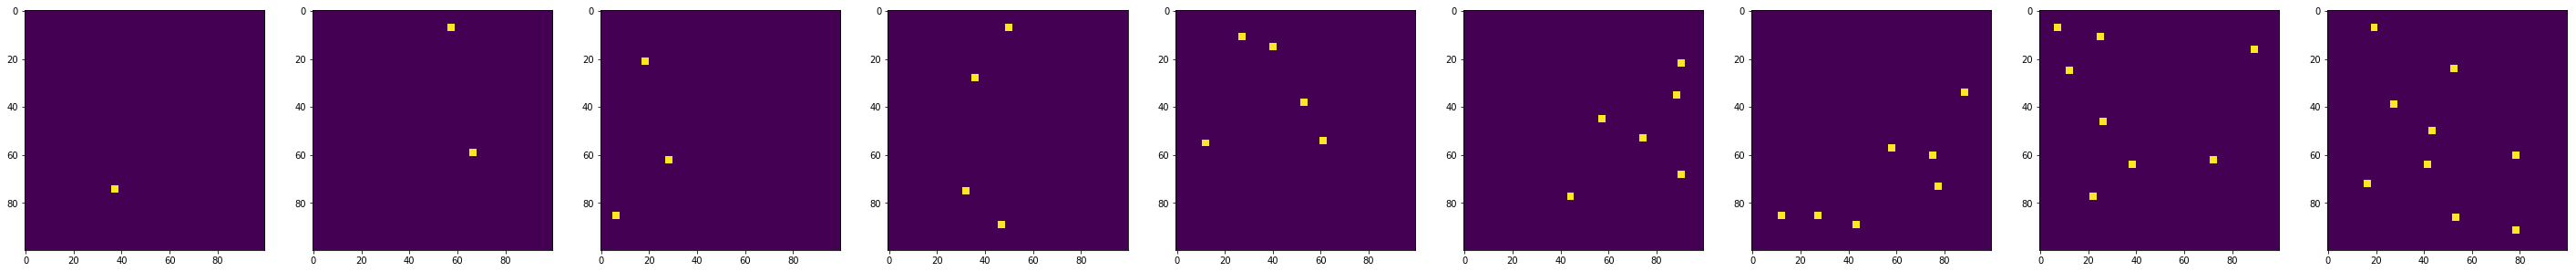

In [7]:
images_ind, label_ind_scalar, label_ind_classifier = create_data_po.get_po_ind(margin, spacing, width, height, min_blobs, max_blobs)
pickle.dump( (images_ind, label_ind_scalar, label_ind_classifier), open( "po_ind.p", "wb" ) )

# Display images of all numerosities
fig, axs = plt.subplots(1, max_blobs, figsize=(50,5))
for i in range(max_blobs):
    axs[i].imshow(list(chunks(images_ind[i*1000], 100)))
plt.show()

In [8]:
label_ind_scalar[0]

array([1.])

In [9]:
label_ind_classifier[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0.])

# Load Data

## Get data from saved pickle

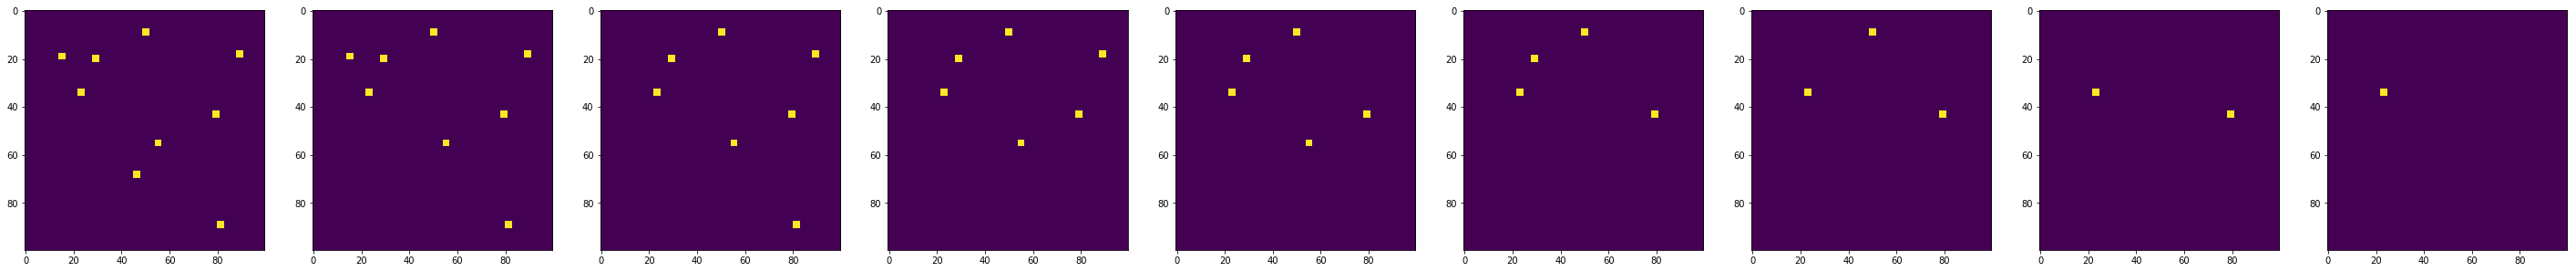

In [10]:
images_inc, label_inc_scalar, label_inc_classifier = pickle.load( open( "po_inc.p", "rb" ) )
fig, axs = plt.subplots(1, max_blobs, figsize=(50,5))
for i in range(max_blobs):
    axs[i].imshow(list(chunks(images_inc[i], 100)))
plt.show()

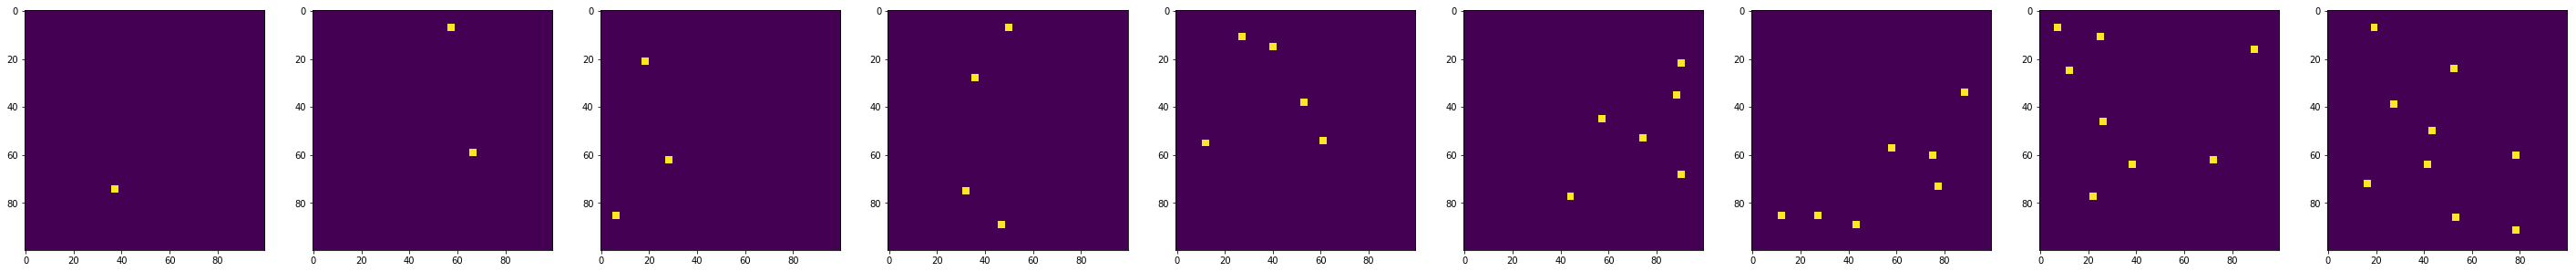

In [11]:
images_ind, label_ind_scalar, label_ind_classifier = pickle.load( open( "po_ind.p", "rb" ) )
fig, axs = plt.subplots(1, max_blobs, figsize=(50,5))
for i in range(max_blobs):
    axs[i].imshow(list(chunks(images_ind[i*1000], 100)))
plt.show()

## Load batches

In [12]:
import load_input
importlib.reload(load_input)
import analysis_estimation_nds
importlib.reload(analysis_estimation_nds)

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


['/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py', '-f', 'true', 'true', 'true', 'true', 'true', 'model_runs/-f/classify_log.csv', 'model_runs/-f/classifymodel_0.ckpt', 'model_runs/-f/classifymodel_', 'model_runs/-f/zzzdraw_data_5000.npy', 'false', 'true', 'false', 'false', 'true']
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
analysis_estimation_nds.py
analysis_estimation_nds.py


<module 'analysis_estimation_nds' from '/home/sychen23/DRAM/analysis_estimation_nds.py'>

In [13]:
batch_size = 9

9 9 9
[6.] [0. 0. 0. 0. 0. 1. 0. 0. 0.]
[4.] [0. 0. 0. 1. 0. 0. 0. 0. 0.]
[9.] [0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.] [0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.] [1. 0. 0. 0. 0. 0. 0. 0. 0.]
[5.] [0. 0. 0. 0. 1. 0. 0. 0. 0.]
[7.] [0. 0. 0. 0. 0. 0. 1. 0. 0.]
[6.] [0. 0. 0. 0. 0. 1. 0. 0. 0.]
[8.] [0. 0. 0. 0. 0. 0. 0. 1. 0.]


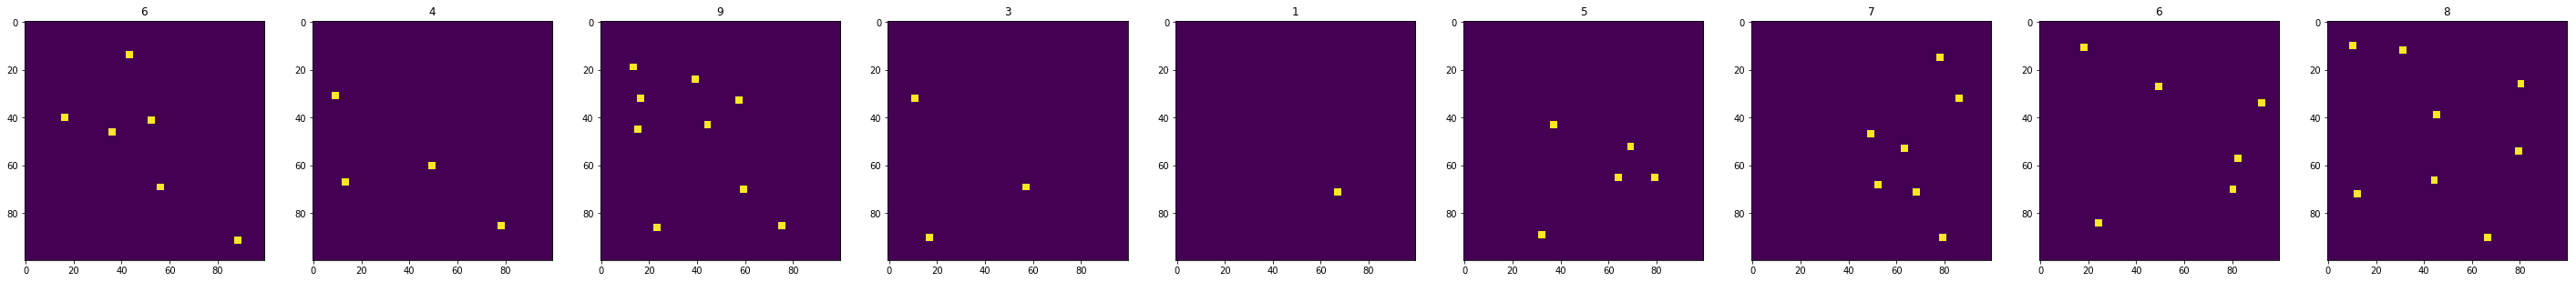

In [17]:
x_inc, y_inc_scalar, y_inc_classifier = analysis_estimation_nds.po_imgs(batch_size, incremental=True)
print(len(x_inc), len(y_inc_scalar), len(y_inc_classifier))
fig, axs = plt.subplots(1, batch_size, figsize=(50,5))
for i in range(batch_size):
    print(y_inc_scalar[i], y_inc_classifier[i])
    axs[i].imshow(list(chunks(x_inc[i], 100)))
    axs[i].set_title(int(y_inc_scalar[i][0]))
plt.show()

9 9 9
[3.] [0. 0. 1. 0. 0. 0. 0. 0. 0.]
[4.] [0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.] [1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.] [0. 0. 1. 0. 0. 0. 0. 0. 0.]
[7.] [0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.] [1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6.] [0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.] [0. 1. 0. 0. 0. 0. 0. 0. 0.]
[8.] [0. 0. 0. 0. 0. 0. 0. 1. 0.]


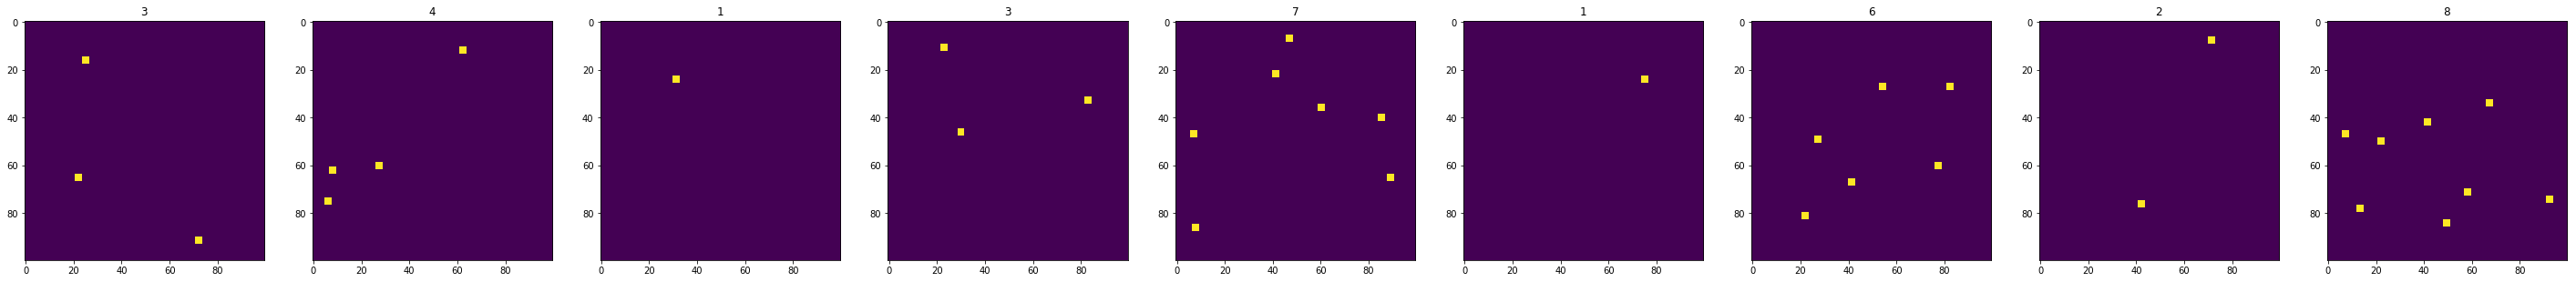

In [18]:
x_ind, y_ind_scalar, y_ind_classifier = analysis_estimation_nds.po_imgs(batch_size, incremental=False)
print(len(x_ind), len(y_ind_scalar), len(y_ind_classifier))
fig, axs = plt.subplots(1, batch_size, figsize=(50,5))
for i in range(batch_size):
    print(y_ind_scalar[i], y_ind_classifier[i])
    axs[i].imshow(list(chunks(x_ind[i], 100)))
    axs[i].set_title(int(y_ind_scalar[i][0]))
plt.show()